In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("tifeeds_embeds_columns.csv")

In [6]:
X_pre_trained = df.filter(regex=("pre_trained.*"))
X_fine_tuned = df.filter(regex=("fine_tuned.*"))

In [3]:
D1 = pd.read_csv('D1.csv', sep=' ', header=None).to_numpy()
H = pd.read_csv('H.csv', sep=' ', header=None).to_numpy()

In [26]:
scores = []
base = test_clf((D1@H).T, df.label)
print("Base: ", base)
scores.append(base)

D1c = D1.copy()
for i in reversed(range(768)):
    D1c[i, i] = 0
    score = test_clf((D1c@H).T, df.label)
    print(f"Experiment {768-i}:", score)
    scores.append(score)

Base:  0.9126984126984127
Experiment 1: 0.9129389129389129
Experiment 2: 0.9129389129389129
Experiment 3: 0.9129389129389129
Experiment 4: 0.9129389129389129
Experiment 5: 0.9129389129389129
Experiment 6: 0.9129389129389129
Experiment 7: 0.9126984126984127
Experiment 8: 0.9126984126984127
Experiment 9: 0.9124579124579124
Experiment 10: 0.9124579124579124
Experiment 11: 0.9124579124579124
Experiment 12: 0.9124579124579124
Experiment 13: 0.9126984126984127
Experiment 14: 0.911976911976912
Experiment 15: 0.9122174122174123
Experiment 16: 0.9117364117364117
Experiment 17: 0.911976911976912
Experiment 18: 0.911976911976912
Experiment 19: 0.911976911976912
Experiment 20: 0.911976911976912
Experiment 21: 0.9117364117364117
Experiment 22: 0.9117364117364117
Experiment 23: 0.9117364117364117
Experiment 24: 0.9117364117364117
Experiment 25: 0.9117364117364117
Experiment 26: 0.9117364117364117
Experiment 27: 0.9117364117364117
Experiment 28: 0.9117364117364117
Experiment 29: 0.9117364117364117
Ex

KeyboardInterrupt: 

In [4]:
pre = TSNE().fit_transform(X_pre_trained)
fine = TSNE().fit_transform(X_fine_tuned)

/home/alex/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/alex/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/alex/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/alex/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [17]:
#from Experimentos.ipynb
tradutor = pd.read_csv('tradutor_julia.csv', sep=' ', header=None).to_numpy()
X_pre_trained.shape, tradutor.shape
#np.linalg.norm(X_pre_trained.T @ tradutor.T)

#pro = TSNE().fit_transform((X_pre_trained.T@tradutor.T).T)

((13859, 768), (1536, 13859))

In [16]:
scatter(pro)
#tradutor.shape

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1536 but corresponding boolean dimension is 13859

In [13]:
id_0 = df.label == 0
id_1 = df.label == 1
def scatter(x):
    plt.scatter(x[id_0, 0], x[id_0, 1], s=1)
    plt.scatter(x[id_1, 0], x[id_1, 1], s=1)
    plt.show()

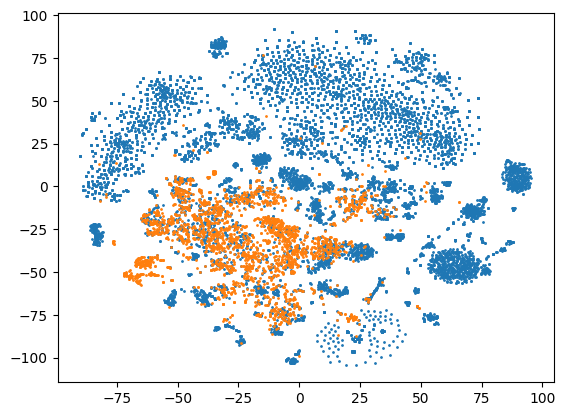

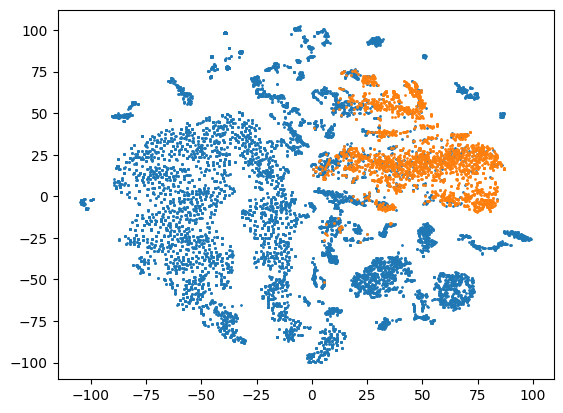

NameError: name 'pro' is not defined

In [7]:
scatter(pre)
scatter(fine)
scatter(pro)

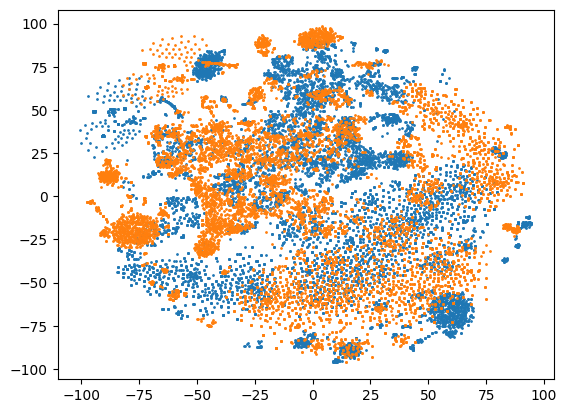

In [37]:
maxi = 10000
plt.scatter(pre[:maxi, 0], pre[:maxi, 1], s=1)
plt.scatter(pro[:maxi, 0], pro[:maxi, 1], s=1)
plt.scatter(fine[:, 0], fine[:, 1], s=1)

In [5]:
# 768 embeddings
print(X_pre_trained.shape)
print(X_fine_tuned.shape)
print(tradutor.shape)

(13859, 768)
(13859, 768)
(768, 768)


In [18]:
def test_clf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, test_size=0.3)
    clf = SVC()
    clf.fit(X_train, y_train)
    return accuracy_score(clf.predict(X_test), y_test)

In [7]:
# Test with pre_trained embeddings
print("Pre-trained acc: ", test_clf(X_pre_trained, df.label))

Pre-trained acc:  0.9126984126984127


In [8]:
# Test with fine-tuned embeddings
print("Fine-tuned acc: ", test_clf(X_fine_tuned, df.label))

Fine-tuned acc:  0.9564694564694565


In [59]:
# Test with procrustes
#u, s, vt = np.linalg.svd(X_pre_trained.T @ X_fine_tuned)
print("Procrustes: ", test_clf(X_pre_trained @ tradutor, df.label))
#pro = X_pre_trained @ (vt@u.T)

Procrustes:  0.8107263107263107


In [5]:
def balance(df):
    pos = df[df['label'] == 1]
    neg = df[~df.index.isin(pos.index)]
    neg = neg.iloc[:pos.shape[0]]
    return pd.concat([pos,neg])

In [9]:
# Testing with balanced datasets

df_balanced = balance(df)
df_balanced['label'].value_counts()

1.0    2534
0.0    2534
Name: label, dtype: int64

In [9]:
X_pre_trained = df_balanced.filter(regex=("pre_trained.*"))
X_fine_tuned = df_balanced.filter(regex=("fine_tuned.*"))
print("Pre-trained: ", test_clf(X_pre_trained, df_balanced.label))
print("Fine-tuned: ", test_clf(X_fine_tuned, df_balanced.label))

Pre-trained:  0.9769888231426693
Fine-tuned:  0.980276134122288
